In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score
import keras
import tensorflow as tf
import datetime as dt

In [2]:
df=pd.read_csv(r"C:\Users\shres\OneDrive\Desktop\DATA\Analytics Vidhya\Applied Machine Learning\ML Interpretability\Fraud Analysis\fraudTrain.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
df.drop(['first','last'],axis=1,inplace=True)

In [7]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud'],
      dtype='object')

In [8]:
df.value_counts('merchant')

merchant
fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Treutel-King                       775
fraud_Douglas, DuBuque and McKenzie      775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: count, Length: 693, dtype: int64

In [9]:
df.drop('merchant',axis=1,inplace=True)

In [10]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'category', 'amt', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [11]:
df.street.value_counts()

street
0069 Robin Brooks Apt. 695           3123
864 Reynolds Plains                  3123
8172 Robertson Parkways Suite 072    3119
4664 Sanchez Common Suite 930        3117
8030 Beck Motorway                   3113
                                     ... 
7281 Joshua Mills Apt. 077              7
3307 Ferguson Way                       7
9599 Washington Field Suite 238         7
3437 Ross Flat Apt. 592                 7
27954 Hall Mill Suite 575               7
Name: count, Length: 983, dtype: int64

In [12]:
df.city.value_counts()

city
Birmingham     5617
San Antonio    5130
Utica          5105
Phoenix        5075
Meridian       5060
               ... 
Vacaville         7
Claypool          7
Karns City        7
Bruce             7
Chattanooga       7
Name: count, Length: 894, dtype: int64

In [13]:
df.zip.value_counts()

zip
73754    3646
34112    3613
48088    3597
82514    3527
49628    3123
         ... 
46510       7
16041       7
38915       7
10018       7
23523       7
Name: count, Length: 970, dtype: int64

In [14]:
df.drop(['street','zip','city','state'],axis=1,inplace=True)

In [15]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'category', 'amt', 'gender', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [16]:
df.drop(['cc_num','trans_num','unix_time'],axis=1,inplace=True)

In [17]:
df.columns

Index(['trans_date_trans_time', 'category', 'amt', 'gender', 'lat', 'long',
       'city_pop', 'job', 'dob', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [18]:
df.drop('job',axis=1,inplace=True)

In [19]:
df.category.value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

In [20]:
df.groupby('category').is_fraud.mean()

category
entertainment     0.002478
food_dining       0.001651
gas_transport     0.004694
grocery_net       0.002948
grocery_pos       0.014098
health_fitness    0.001549
home              0.001608
kids_pets         0.002114
misc_net          0.014458
misc_pos          0.003139
personal_care     0.002424
shopping_net      0.017561
shopping_pos      0.007225
travel            0.002864
Name: is_fraud, dtype: float64

In [21]:
df=pd.get_dummies(df,columns=['category'],dtype='int')

In [22]:
df.columns

Index(['trans_date_trans_time', 'amt', 'gender', 'lat', 'long', 'city_pop',
       'dob', 'merch_lat', 'merch_long', 'is_fraud', 'category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel'],
      dtype='object')

In [23]:
df.trans_date_trans_time=pd.to_datetime(df.trans_date_trans_time)

In [24]:
df.dob=pd.to_datetime(df.dob)

In [25]:
df.dtypes

trans_date_trans_time      datetime64[ns]
amt                               float64
gender                             object
lat                               float64
long                              float64
city_pop                            int64
dob                        datetime64[ns]
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
category_entertainment              int32
category_food_dining                int32
category_gas_transport              int32
category_grocery_net                int32
category_grocery_pos                int32
category_health_fitness             int32
category_home                       int32
category_kids_pets                  int32
category_misc_net                   int32
category_misc_pos                   int32
category_personal_care              int32
category_shopping_net               int32
category_shopping_pos               int32
category_travel                   

In [26]:
df.gender=df.gender.map({'F':1,'M':0})

In [27]:
df.head()

,trans_date_trans_time,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2019-01-01 00:00:18,4.97,1,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,...,0,0,0,0,1,0,0,0,0,0
1,2019-01-01 00:00:44,107.23,1,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,...,1,0,0,0,0,0,0,0,0,0
2,2019-01-01 00:00:51,220.11,0,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 00:01:16,45.00,0,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-01 00:03:06,41.96,0,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
df['hour']=df.trans_date_trans_time.dt.hour

In [29]:
df.head()

,trans_date_trans_time,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,hour
0,2019-01-01 00:00:18,4.97,1,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,...,0,0,0,1,0,0,0,0,0,0
1,2019-01-01 00:00:44,107.23,1,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,...,0,0,0,0,0,0,0,0,0,0
2,2019-01-01 00:00:51,220.11,0,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 00:01:16,45.00,0,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-01 00:03:06,41.96,0,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,...,0,0,0,0,1,0,0,0,0,0


In [30]:
df.dob.dt.year

0          1988
1          1978
2          1962
3          1967
4          1986
           ... 
1296670    1961
1296671    1979
1296672    1967
1296673    1980
1296674    1995
Name: dob, Length: 1296675, dtype: int32

In [31]:
df['age']=df.trans_date_trans_time.dt.year-df.dob.dt.year

In [32]:
a=pd.crosstab(df.hour,df.is_fraud)

In [33]:
a

is_fraud,0,1
hour,,
0,41867,635
1,42211,658
2,42031,625
3,42160,609
4,41817,46
5,42111,60
6,42260,40
7,42147,56
8,42456,49


In [34]:
a.index

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23],
      dtype='int32', name='hour')

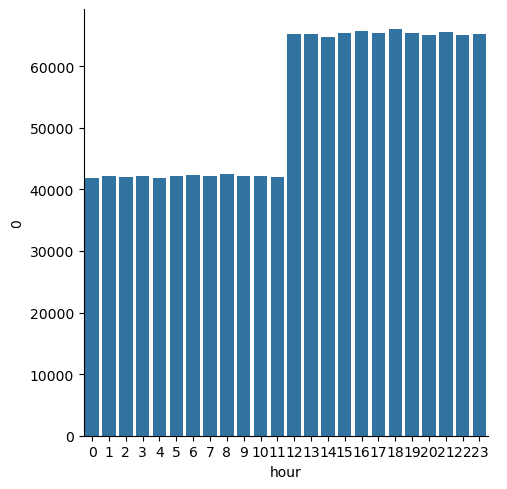

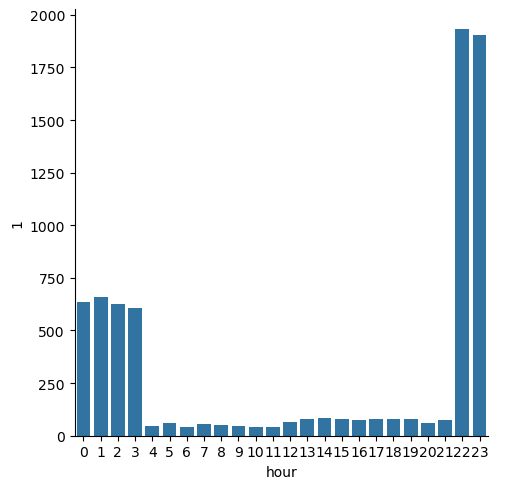

In [35]:
sns.catplot(x=a.index,y=a[0],kind='bar')
sns.catplot(x=a.index,y=a[1],kind='bar')

In [36]:
df.groupby('age').is_fraud.mean()

age
14    0.005311
15    0.002751
16    0.007249
17    0.000000
18    0.014868
        ...   
92    0.015730
93    0.002815
94    0.015679
95    0.000000
96    0.000000
Name: is_fraud, Length: 83, dtype: float64

In [37]:
df.columns

Index(['trans_date_trans_time', 'amt', 'gender', 'lat', 'long', 'city_pop',
       'dob', 'merch_lat', 'merch_long', 'is_fraud', 'category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'hour', 'age'],
      dtype='object')

In [38]:
df.drop(['trans_date_trans_time','dob'],axis=1,inplace=True)

In [80]:
df.head()

,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,category_entertainment,category_food_dining,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,hour,age
0,4.97,1,36.0788,-81.1781,3495,36.011293,-82.048315,0,0,0,...,0,0,1,0,0,0,0,0,0,31
1,107.23,1,48.8878,-118.2105,149,49.159047,-118.186462,0,0,0,...,0,0,0,0,0,0,0,0,0,41
2,220.11,0,42.1808,-112.2620,4154,43.150704,-112.154481,0,1,0,...,0,0,0,0,0,0,0,0,0,57
3,45.00,0,46.2306,-112.1138,1939,47.034331,-112.561071,0,0,0,...,0,0,0,0,0,0,0,0,0,52
4,41.96,0,38.4207,-79.4629,99,38.674999,-78.632459,0,0,0,...,0,0,0,1,0,0,0,0,0,33


Now that we have prepared the training dataset we will prepare the test dataset

In [90]:
train=df.copy()
train.shape

(1296675, 24)

In [96]:
test=pd.read_csv(r"C:\Users\shres\OneDrive\Desktop\DATA\Analytics Vidhya\Applied Machine Learning\ML Interpretability\Fraud Analysis\fraudTest.csv")

In [98]:
test.shape

(555719, 23)

In [102]:
test.drop(['Unnamed: 0','first','last','merchant','street','zip','city','state','cc_num','trans_num','unix_time'],axis=1,inplace=True)

In [104]:
test.columns

Index(['trans_date_trans_time', 'category', 'amt', 'gender', 'lat', 'long',
       'city_pop', 'job', 'dob', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [109]:
test=pd.get_dummies(test,columns=['category'],dtype='int')

In [111]:
test.dob=pd.to_datetime(test.dob)
test.trans_date_trans_time=pd.to_datetime(test.trans_date_trans_time)
test.gender=test.gender.map({'F':1,'M':0})

In [117]:
test['hour']=test.trans_date_trans_time.dt.hour
test['age']=test.trans_date_trans_time.dt.year-test.dob.dt.year

In [125]:
test.drop(['trans_date_trans_time','dob'],axis=1,inplace=True)
test.drop('job',axis=1,inplace=True)

In [127]:
test.head()

,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,category_entertainment,category_food_dining,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,hour,age
0,2.86,0,33.9659,-80.9355,333497,33.986391,-81.200714,0,0,0,...,0,0,0,0,1,0,0,0,12,52
1,29.84,1,40.3207,-110.4360,302,39.450498,-109.960431,0,0,0,...,0,0,0,0,1,0,0,0,12,30
2,41.28,1,40.6729,-73.5365,34496,40.495810,-74.196111,0,0,0,...,0,0,0,0,0,0,0,0,12,50
3,60.05,0,28.5697,-80.8191,54767,28.812398,-80.883061,0,0,0,...,0,0,0,1,0,0,0,0,12,33
4,3.19,0,44.2529,-85.0170,1126,44.959148,-85.884734,0,0,0,...,0,0,0,0,0,0,0,1,12,65


In [131]:
x_train=train.drop('is_fraud',axis=1)
y_train=train['is_fraud']

In [135]:
x_test=test.drop('is_fraud',axis=1)
y_test=test['is_fraud']

In [189]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=10,random_state=2,shuffle=True)

In [201]:
m1=LogisticRegression()
m1

LogisticRegression()

In [203]:
accuracy1=[]
for train_index,test_index in skf.split(x_train,y_train):
    m1.fit(x_train.iloc[train_index,:],y_train[train_index])
    acc=accuracy_score(y_train[test_index],m1.predict(x_train.iloc[test_index,:]))
    accuracy1.append(acc)
    print(acc)

C:\Users\shres\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9936221735509146


C:\Users\shres\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9937455655982972


C:\Users\shres\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9936375975568374


C:\Users\shres\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9937070055834901


C:\Users\shres\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9937301415923744


C:\Users\shres\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9936298364271557


C:\Users\shres\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9935989881774083


C:\Users\shres\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9936915329266506


C:\Users\shres\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9936529726144663
0.9935372916779134


C:\Users\shres\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [209]:
accuracy_score(y_test,m1.predict(x_test))

0.9954185478632186

We have a logistic regression with a very high score

Let's interpret the model by understanding the coefficient and intercept

In [225]:
m1_interpretation=pd.DataFrame({'Col/Intercept':'Intercept','Value':m1.intercept_})
m1_interpretation

,Col/Intercept,Value
0,Intercept,-0.000759


In [281]:
m1.coef_.transpose()

array([[ 3.00794086e-03],
       [-7.95883511e-04],
       [-2.52409838e-02],
       [ 2.26848745e-02],
       [-2.42697827e-08],
       [-2.52721037e-02],
       [ 2.26457555e-02],
       [-3.09979874e-04],
       [-3.82410022e-04],
       [-9.57686000e-05],
       [-1.34866633e-04],
       [ 1.18959761e-03],
       [-3.62271195e-04],
       [-5.05503904e-04],
       [-4.05596968e-04],
       [ 5.68375100e-04],
       [-2.82710550e-04],
       [-2.79008720e-04],
       [ 9.62955167e-04],
       [-2.12610417e-04],
       [-5.09265010e-04],
       [-2.70542678e-03],
       [ 8.42255427e-03]])

In [285]:
new_section={'Col/Intercept':x_train.columns,'Value':m1.coef_}
additional=pd.DataFrame()
additional['Col/Intercept']=x_train.columns
additional['Value']=pd.Series(m1.coef_.transpose().reshape(-1))

In [319]:
m1_interpretation=pd.concat([m1_interpretation,additional.sort_values(by='Value')])

In [321]:
m1_interpretation.reset_index(inplace=True,drop=True)
m1_interpretation

,level_0,index,Col/Intercept,Value
0,0.0,0.0,Intercept,-7.590645e-04
1,1.0,5.0,merch_lat,-2.527210e-02
2,2.0,2.0,lat,-2.524098e-02
3,3.0,21.0,hour,-2.705427e-03
4,4.0,1.0,gender,-7.958835e-04
5,5.0,20.0,category_travel,-5.092650e-04
6,6.0,13.0,category_home,-5.055039e-04
7,7.0,14.0,category_kids_pets,-4.055970e-04
8,8.0,8.0,category_food_dining,-3.824100e-04
9,9.0,12.0,category_health_fitness,-3.622712e-04
